In [2]:
import pandas as pd
import numpy as np
import imblearn as im
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
general_data=pd.read_csv('general_data.csv')
employee_survey_data=pd.read_csv('employee_survey_data.csv')
manager_survey_data=pd.read_csv('manager_survey_data.csv')

In [4]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [6]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [14]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [16]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [17]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [18]:
#joining manager_survey_data and employee_survey_data tables
general_data1 = general_data.join([manager_survey_data.drop('EmployeeID', axis=1), employee_survey_data.drop('EmployeeID', axis=1)]).copy(deep=True)
general_data2=general_data1.drop('EmployeeID', axis=1).copy(deep=True)

In [19]:
general_data3=general_data2.copy(deep=True)

In [20]:
general_data3.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.723603,2.728246,2.761436
std,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.092756,1.101253,0.706245
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [21]:
#checking data is balanced or not
general_data3['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition'>

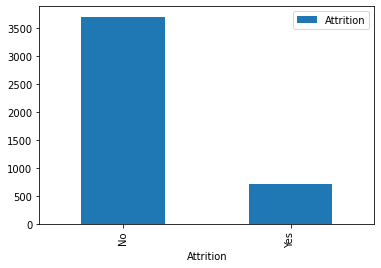

In [22]:
general_data3['Attrition'].value_counts()
general_data3.groupby(by='Attrition').agg({'Attrition':'count'}).plot(kind='bar')

DATA IS NOT BALANCED , MORE 'NO' CLASS THAN 'YES' CLASS

Text(0, 0.5, 'No. of attrition')

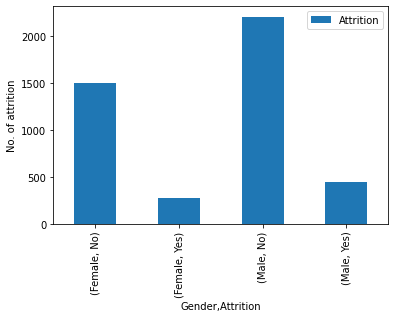

In [26]:
general_data3.groupby(['Gender','Attrition']).agg({'Attrition':'count'}).plot(kind='bar')
plt.ylabel('No. of attrition')

In [27]:
disc_col = []
for column in general_data3.columns:
    if general_data3[column].dtypes != object and general_data3[column].nunique() < 30:
        print(f"{column} : {general_data3[column].unique()}")
        disc_col.append(column)
#disc_col1=disc_col.remove('Attrition')  check
disc_col

DistanceFromHome : [ 6 10 17  2  8 11 18  1  7 28 14  3  4 16  9  5 20 29 15 13 24 19 22 25
 21 26 27 12 23]
Education : [2 1 4 5 3]
EmployeeCount : [1]
JobLevel : [1 4 3 2 5]
NumCompaniesWorked : [ 1.  0.  3.  4.  2.  7.  9.  5.  6.  8. nan]
PercentSalaryHike : [11 23 15 12 13 20 22 21 17 14 16 18 19 24 25]
StandardHours : [8]
StockOptionLevel : [0 1 3 2]
TrainingTimesLastYear : [6 3 2 5 4 0 1]
YearsSinceLastPromotion : [ 0  1  7  4 10  9  6 11  3  5  2  8 13 12 15 14]
YearsWithCurrManager : [ 0  4  3  5  7  8 10 11 13  9  1  2  6 12 17 16 15 14]
JobInvolvement : [3 2 1 4]
PerformanceRating : [3 4]
EnvironmentSatisfaction : [ 3.  2.  4.  1. nan]
JobSatisfaction : [ 4.  2.  1.  3. nan]
WorkLifeBalance : [ 2.  4.  1.  3. nan]


['DistanceFromHome',
 'Education',
 'EmployeeCount',
 'JobLevel',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StandardHours',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'JobInvolvement',
 'PerformanceRating',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance']

PLOTTING ATTRITION VS COLUMNS AS HISTOGRAM 

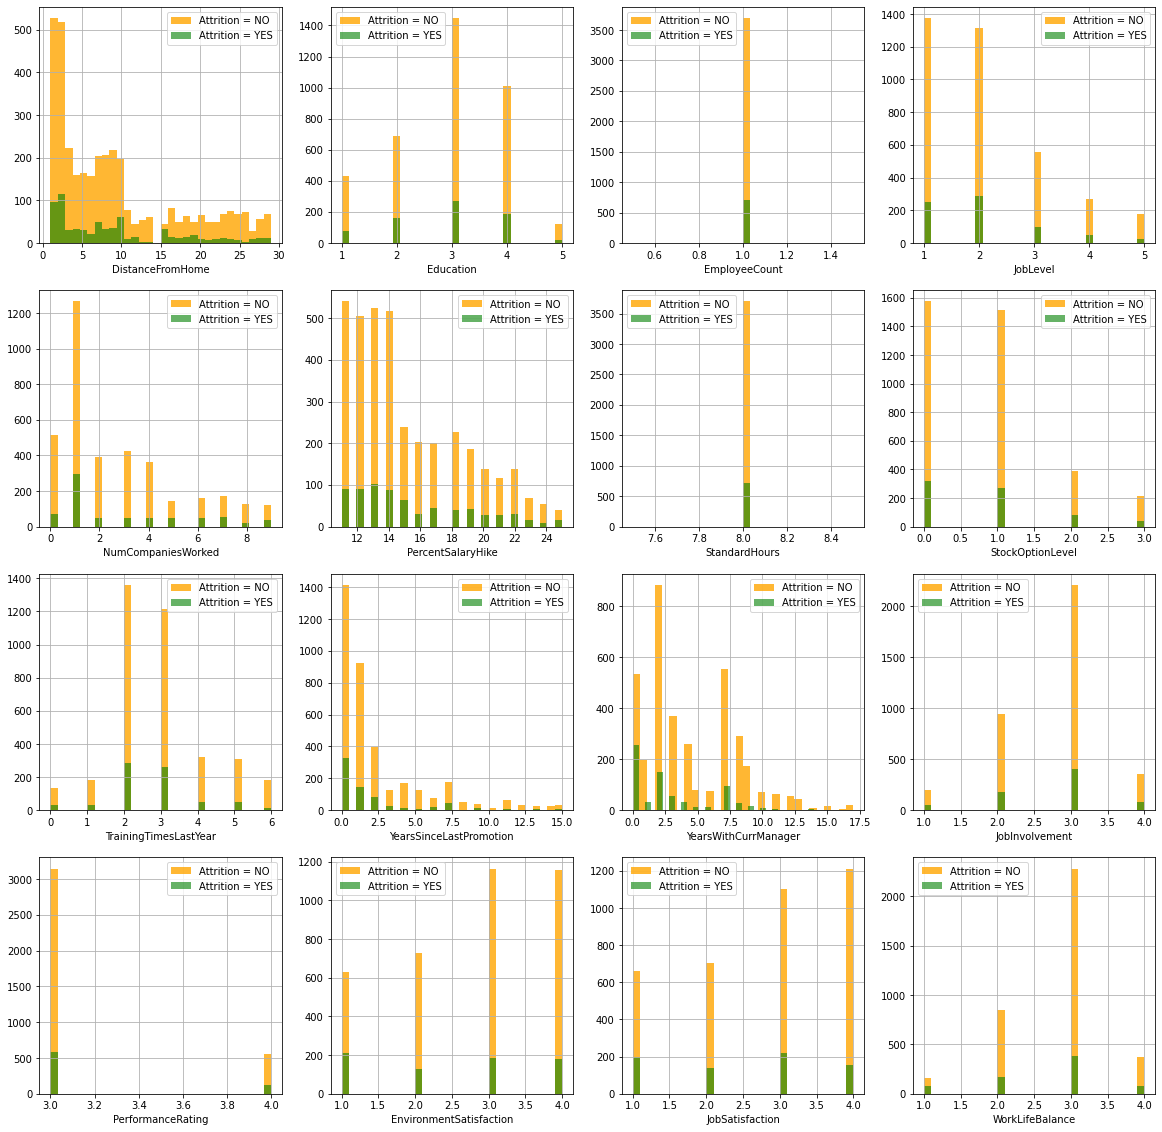

In [28]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(4, 4, i)
    general_data3[general_data3["Attrition"] == 'No'][column].hist(bins=30, color='orange', label='Attrition = NO', alpha=0.8)
    general_data3[general_data3["Attrition"] == 'Yes'][column].hist(bins=30, color='green', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [29]:
cont_col = []  #continue data column
for column in general_data3.columns:
    if general_data3[column].dtypes != object and general_data3[column].nunique() > 30:
        print(f"{column} : Minimum: {general_data3[column].min()}, Maximum: {general_data3[column].max()}")
        cont_col.append(column)
        print("====================================")

Age : Minimum: 18, Maximum: 60
MonthlyIncome : Minimum: 10090, Maximum: 199990
TotalWorkingYears : Minimum: 0.0, Maximum: 40.0
YearsAtCompany : Minimum: 0, Maximum: 40


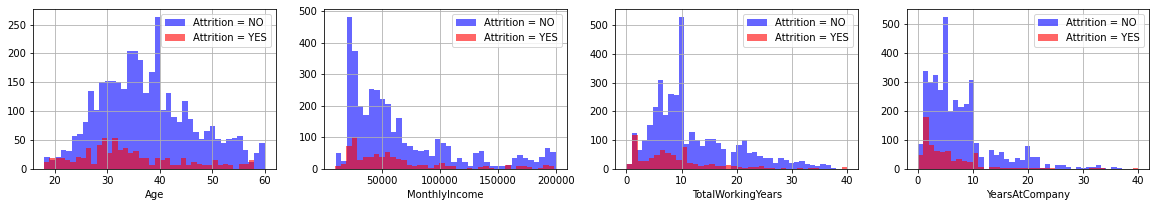

In [48]:
plt.figure(figsize=(20, 10))

for i, column in enumerate(cont_col, 1):
    plt.subplot(3, 4, i)
    general_data3[general_data3["Attrition"] == 'No'][column].hist(bins=40, color='blue', label='Attrition = NO', alpha=0.6)
    general_data3[general_data3["Attrition"] == 'Yes'][column].hist(bins=40, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [30]:
general_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [50]:
#columns with NAN values =[NumCompaniesWorked , TotalWorkingYears , EnvironmentSatisfaction, JobSatisfaction, WorkLifeBalance]

In [31]:
#filling NaN values with mean value
general_data3['NumCompaniesWorked'].fillna(general_data3['NumCompaniesWorked'].mean(), inplace=True)
general_data3['TotalWorkingYears'].fillna(general_data3['TotalWorkingYears'].mean(), inplace=True)
general_data3['EnvironmentSatisfaction'].fillna(general_data3['EnvironmentSatisfaction'].mean(), inplace=True)
general_data3['JobSatisfaction'].fillna(general_data3['JobSatisfaction'].mean(), inplace=True)
general_data3['WorkLifeBalance'].fillna(general_data3['WorkLifeBalance'].mean(), inplace=True)


In [32]:
general_data3.info()
general_data3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4410 non-null   float64
 14  Over18                  

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
dtype: int64

In [ ]:
#working with categorical data

In [ ]:
#column with two categories classes are label encoded

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
general_data3['Attrition'] = le.fit_transform(general_data['Attrition'])
general_data3['Gender']=le.fit_transform(general_data3['Gender'])
general_data3['Over18']=le.fit_transform(general_data3['Over18'])

In [34]:
general_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int32  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   Gender                   4410 non-null   int32  
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4410 non-null   float64
 14  Over18                  

In [35]:
general_data3.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,0,1,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,0,1,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,1,4,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,1,3,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,1,1,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0


In [36]:
#columns with more than two categories classes are converted using 'get_dummies' method 

In [37]:
general_data3 = pd.get_dummies(general_data3, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])
#general_data3.info()
#general_data3=pd.get_dummies(general_data3) 

In [38]:
general_data3.head()
general_data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4410 non-null   int64  
 1   Attrition                          4410 non-null   int32  
 2   DistanceFromHome                   4410 non-null   int64  
 3   Education                          4410 non-null   int64  
 4   EmployeeCount                      4410 non-null   int64  
 5   Gender                             4410 non-null   int32  
 6   JobLevel                           4410 non-null   int64  
 7   MonthlyIncome                      4410 non-null   int64  
 8   NumCompaniesWorked                 4410 non-null   float64
 9   Over18                             4410 non-null   int32  
 10  PercentSalaryHike                  4410 non-null   int64  
 11  StandardHours                      4410 non-null   int64

In [39]:
X = general_data3.drop('Attrition',axis=1)
y = general_data3['Attrition']
#general_data3.drop()

In [40]:
# define oversampling strategy
oversample = im.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [41]:
#oversample = im.over_sampling.RandomOverSampler(sampling_strategy=0.5)

In [42]:
X, y = oversample.fit_resample(X, y)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=400,random_state= 0)
X_train.head()

,Age,DistanceFromHome,Education,EmployeeCount,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
6942,24,2,5,1,1,3,47680,2.0,0,11,...,0,0,0,0,0,1,0,0,1,0
2817,36,25,1,1,1,2,31170,6.0,0,21,...,0,0,0,0,1,0,0,1,0,0
2759,45,14,3,1,0,1,54730,4.0,0,13,...,0,0,0,0,0,1,0,0,1,0
5786,31,2,1,1,1,3,70940,1.0,0,14,...,0,0,0,0,0,1,0,0,1,0
2131,59,4,2,1,1,2,165950,6.0,0,21,...,0,0,0,0,1,0,0,0,0,1


In [68]:
X_train.info()
y_train.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6998 entries, 6942 to 2732
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6998 non-null   int64  
 1   DistanceFromHome                   6998 non-null   int64  
 2   Education                          6998 non-null   int64  
 3   EmployeeCount                      6998 non-null   int64  
 4   Gender                             6998 non-null   int32  
 5   JobLevel                           6998 non-null   int64  
 6   MonthlyIncome                      6998 non-null   int64  
 7   NumCompaniesWorked                 6998 non-null   float64
 8   Over18                             6998 non-null   int32  
 9   PercentSalaryHike                  6998 non-null   int64  
 10  StandardHours                      6998 non-null   int64  
 11  StockOptionLevel                   6998 non-null   in

0    3511
1    3487
Name: Attrition, dtype: int64

In [44]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [45]:
predicted=model.predict(X_test)
#predicted[-4]=1
#predicted[6]=1
#predicted[14]=1
predicted

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,

In [46]:
from sklearn.metrics import accuracy_score
r=accuracy_score(predicted,y_test)
r

0.6725

In [47]:
# dropping features with single observation types
cols = ['EmployeeCount', 'Over18', 'StandardHours']
X_train.drop(cols, axis=1, inplace=True)
X_test.drop(cols, axis=1, inplace=True)

C:\Users\Yash\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

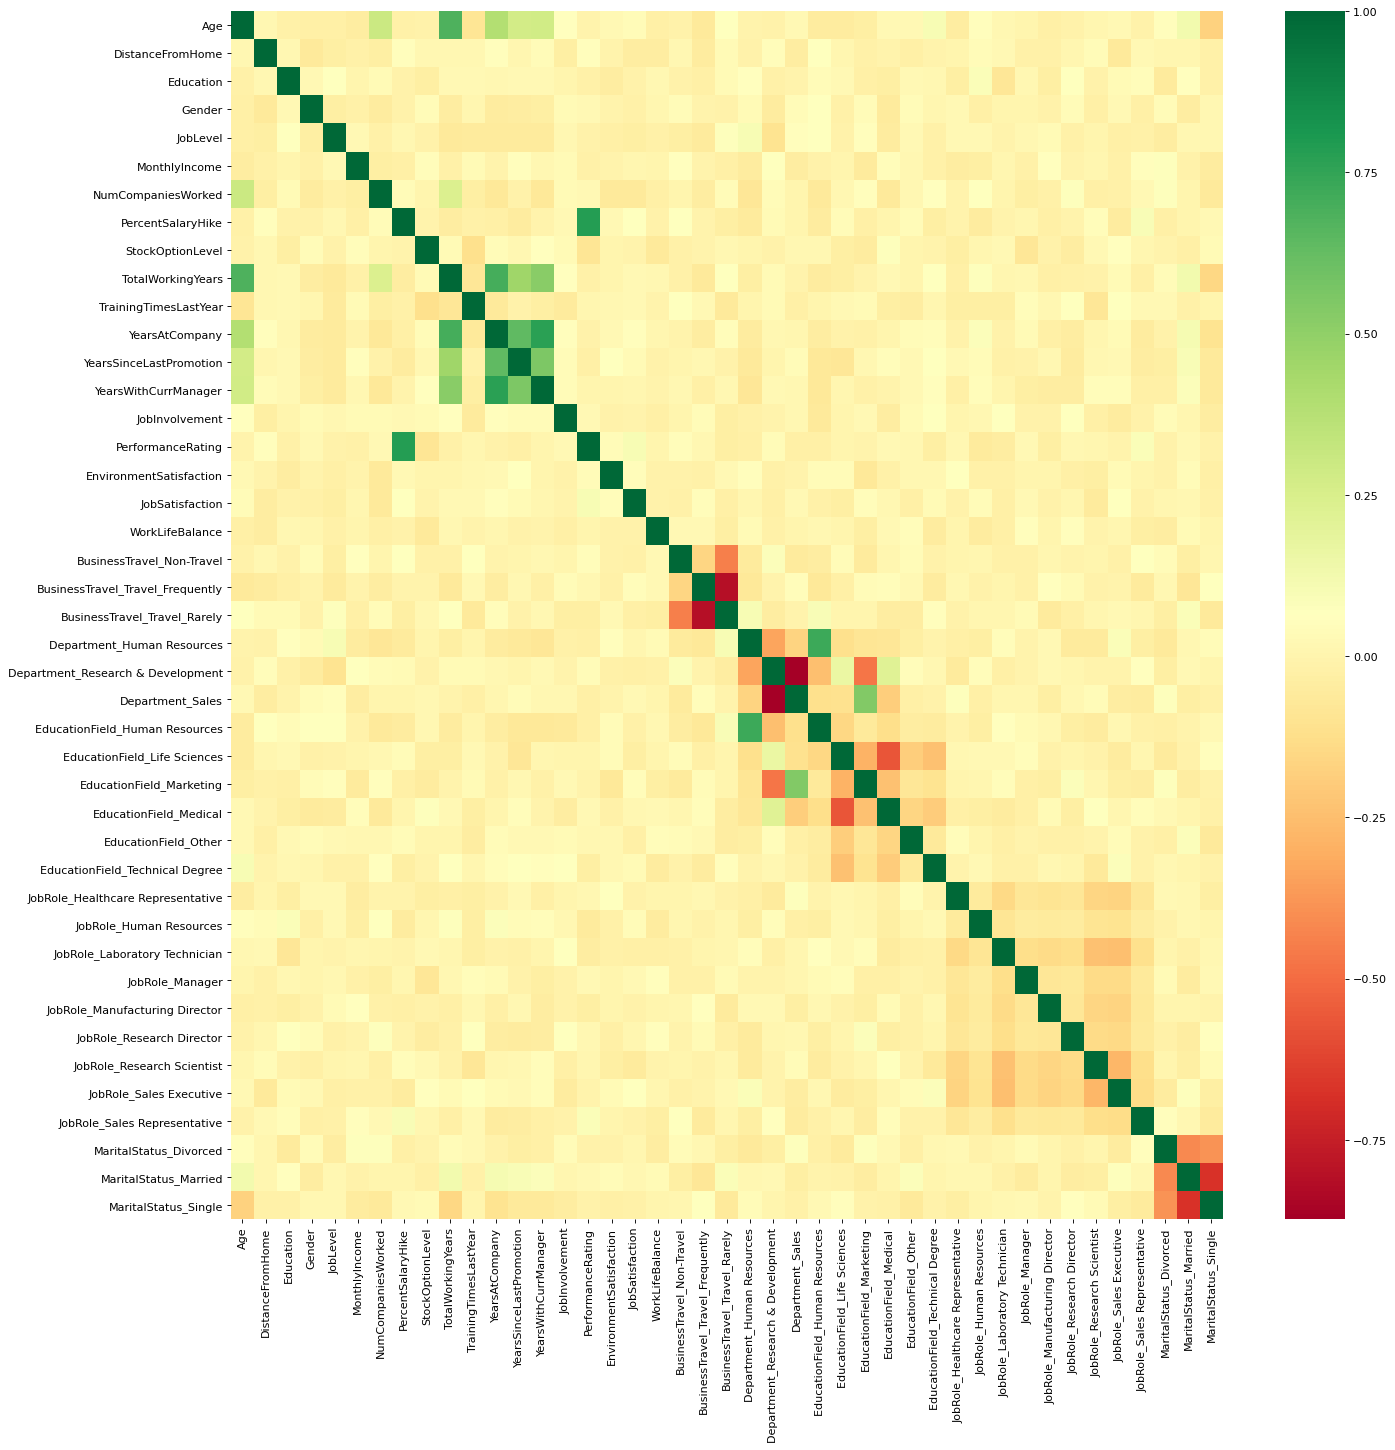

In [49]:
#plt.figure(figsize=(10,20))
feature_corr=pd.DataFrame(X_train).corr()
plt.figure(figsize=(20, 20), dpi=80)
sns.heatmap(feature_corr,cmap="RdYlGn")

In [50]:
feature_corr.head()

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,0.013503,-0.024085,-0.027624,-0.029392,-0.040213,0.304563,-0.023454,-0.013492,0.681915,...,0.013032,-0.000602,-0.031043,-0.010671,0.008271,0.022113,-0.016538,0.054481,0.127598,-0.172964
DistanceFromHome,0.013503,1.000000,0.016156,-0.066039,-0.035813,-0.024052,-0.033616,0.050136,0.012353,0.016456,...,0.023877,-0.021302,-0.019772,0.007074,0.034442,-0.063360,0.025268,0.011831,0.010810,-0.020443
Education,-0.024085,0.016156,1.000000,0.022904,0.065214,0.000149,0.027568,-0.016636,-0.035236,0.019988,...,-0.082750,0.015358,-0.035804,0.065062,-0.015995,0.030786,0.041777,-0.056207,0.061628,-0.017329
Gender,-0.027624,-0.066039,0.022904,1.000000,-0.032390,-0.020946,-0.051626,-0.016853,0.038234,-0.039081,...,0.004825,-0.001061,-0.015175,0.035914,-0.029463,0.026503,-0.026219,0.035228,-0.046079,0.018411
JobLevel,-0.029392,-0.035813,0.065214,-0.032390,1.000000,0.020188,-0.021724,0.016814,-0.010650,-0.068167,...,-0.007063,0.016123,0.029769,-0.018823,0.003680,-0.025516,-0.024241,-0.039358,0.017788,0.013560


<AxesSubplot:>

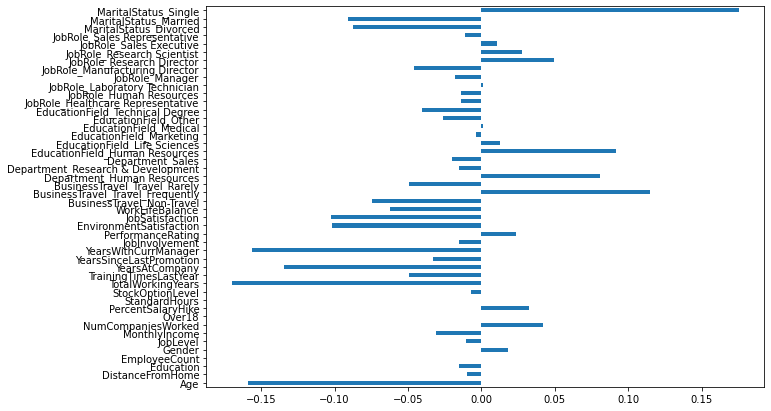

In [51]:
general_data3.drop('Attrition', axis=1).corrwith(general_data3.Attrition).plot(kind='barh', figsize=(10, 7))

In [82]:
#features_index = ['Department_Sales','TotalWorkingYears', 'YearsWithCurrManager', 
 #                 'PercentSalaryHike', 'BusinessTravel_Travel_Frequently', 'EducationField_Human Resources',
  #               'YearsSinceLastPromotion']
#X_test = X_test.drop(features_index,axis=1)
#X_train = X_train.drop(features_index,axis=1)
#

In [52]:
X_train2=X_train.copy(deep=True)

In [53]:
l=[]
for i in range(feature_corr.shape[0]):
    for j in range(i+1,feature_corr.shape[0]):
        if feature_corr.iloc[i,j]>=0.7:
            l.append(X_train2.columns[j])
                 
           # if columns[j]:
            #    columns[j]=False
#selected_columns=X_train.columns(columns)
#columns.flatten()
l


['PerformanceRating',
 'YearsAtCompany',
 'YearsWithCurrManager',
 'EducationField_Human Resources']

In [54]:
X_train2.drop(l,axis=1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6998 entries, 6942 to 2732
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6998 non-null   int64  
 1   DistanceFromHome                   6998 non-null   int64  
 2   Education                          6998 non-null   int64  
 3   Gender                             6998 non-null   int32  
 4   JobLevel                           6998 non-null   int64  
 5   MonthlyIncome                      6998 non-null   int64  
 6   NumCompaniesWorked                 6998 non-null   float64
 7   PercentSalaryHike                  6998 non-null   int64  
 8   StockOptionLevel                   6998 non-null   int64  
 9   TotalWorkingYears                  6998 non-null   float64
 10  TrainingTimesLastYear              6998 non-null   int64  
 11  YearsSinceLastPromotion            6998 non-null   in

In [55]:
clf2 = LogisticRegression()
clf2.fit(X_train2, y_train)
pred2 = clf2.predict(X_test)
acc2 = accuracy_score(pred2, y_test)
acc2

0.675

In [56]:
from sklearn.preprocessing import normalize

scaler_cols = [ 'Age', 'DistanceFromHome', 'Education','JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'YearsAtCompany', 
               'StockOptionLevel', 'TrainingTimesLastYear','PerformanceRating', 'JobInvolvement', 
              'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']

Scaled_train = X_train2.copy()
Scaled_test = X_test.copy()

Scaled_train[scaler_cols] = normalize(X_train2[scaler_cols], norm='max')
Scaled_test[scaler_cols] = normalize(X_test[scaler_cols], norm='max')


Scaled_train.head()

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
6942,0.000503,0.000042,0.000105,1,0.000063,1.0,0.000042,11,0.000021,6.0,...,0,0,0,0,0,1,0,0,1,0
2817,0.001155,0.000802,0.000032,1,0.000064,1.0,0.000192,21,0.000032,7.0,...,0,0,0,0,1,0,0,1,0,0
2759,0.000822,0.000256,0.000055,0,0.000018,1.0,0.000073,13,0.000000,17.0,...,0,0,0,0,0,1,0,0,1,0
5786,0.000437,0.000028,0.000014,1,0.000042,1.0,0.000014,14,0.000014,10.0,...,0,0,0,0,0,1,0,0,1,0
2131,0.000356,0.000024,0.000012,1,0.000012,1.0,0.000036,21,0.000006,25.0,...,0,0,0,0,1,0,0,0,0,1


In [57]:
clf3 = LogisticRegression()
clf3.fit(Scaled_train, y_train)
pred3 = clf3.predict(Scaled_test)
acc3 = accuracy_score(pred3, y_test)
acc3

C:\Users\Yash\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.695

In [58]:
#if we want to encode column using loop 
#from  sklearn.preprocessing import LabelEncoder
#for column in df.columns:
 #   if df[column].dtype==np.number:
 #       continue
  #  df[column]=LabelEncoder().fit_transform(df[column])

In [59]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators =10 ,criterion ='entropy' , random_state=0)
forest.fit(Scaled_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [60]:
forest.score(X_test,y_test)

0.5075

In [61]:
# defining model parameters
model = LogisticRegression(random_state=42)
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['l1', 'l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01]

In [62]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(Scaled_train.append(Scaled_test), y_train.append(y_test))
print(grid_result)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(random_state=42),
             n_jobs=-1,
             param_grid={'C': [1000, 100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')


In [63]:
grid_search

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=LogisticRegression(random_state=42),
             n_jobs=-1,
             param_grid={'C': [1000, 100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [64]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
i=1
for mean, stdev, param in zip(means, stds, params):
    print(i)
    print("%f (%f) with: %r" % (mean, stdev, param))
    
    i=i+1
    

Best: 0.704652 using {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
1
0.000000 (0.000000) with: {'C': 1000, 'penalty': 'l1', 'solver': 'newton-cg'}
2
0.000000 (0.000000) with: {'C': 1000, 'penalty': 'l1', 'solver': 'lbfgs'}
3
0.704652 (0.011213) with: {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
4
0.000000 (0.000000) with: {'C': 1000, 'penalty': 'l1', 'solver': 'sag'}
5
0.667163 (0.012048) with: {'C': 1000, 'penalty': 'l1', 'solver': 'saga'}
6
0.666668 (0.011345) with: {'C': 1000, 'penalty': 'l2', 'solver': 'newton-cg'}
7
0.668740 (0.012366) with: {'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
8
0.667794 (0.011459) with: {'C': 1000, 'penalty': 'l2', 'solver': 'liblinear'}
9
0.667523 (0.011688) with: {'C': 1000, 'penalty': 'l2', 'solver': 'sag'}
10
0.667163 (0.012048) with: {'C': 1000, 'penalty': 'l2', 'solver': 'saga'}
11
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'newton-cg'}
12
0.000000 (0.000000) with: {'C': 100, 'penalty': 'l1', 'solver': 'lbfgs'}


In [65]:
import numpy as np
from sklearn.model_selection import RepeatedKFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
random_state = 12883823
rkf = RepeatedKFold(n_splits=2, n_repeats=3, random_state=random_state)
print(X)
for train, test in rkf.split(X):
    print("%s %s" % (train, test))

[[1 2]
 [3 4]
 [1 2]
 [3 4]]
[2 3] [0 1]
[0 1] [2 3]
[0 2] [1 3]
[1 3] [0 2]
[0 3] [1 2]
[1 2] [0 3]
